# Zillow- Exporatory data analysis

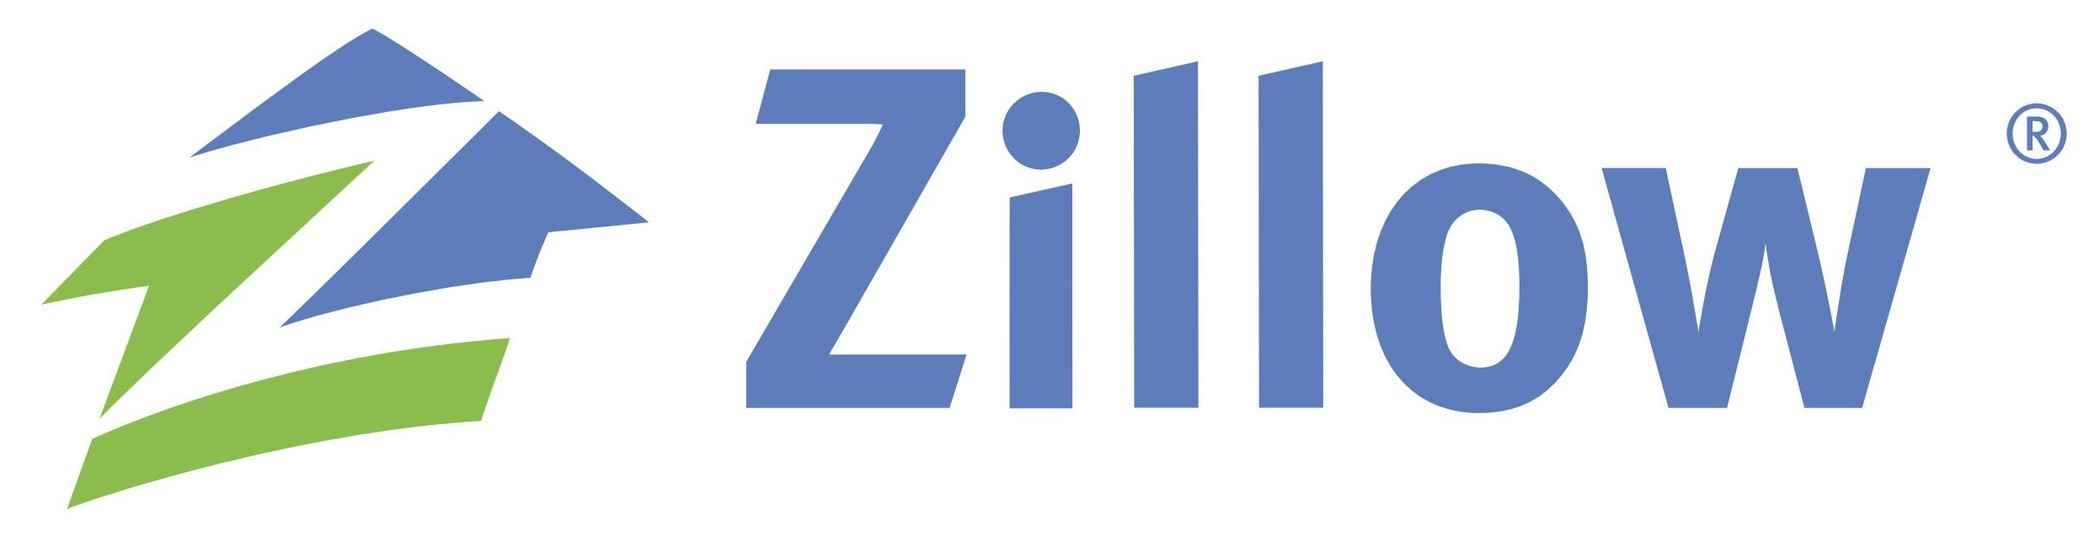

This is the exploratory element of the Zillow 2017 predictions dataset.  This is the first document, which is accompanied by the modeling notebook and final report notebook.   

## Purpose
The purpose of this notebook is to explore the data to identify which variables are primarily responsible for the changes in home prices from the data set.

### Goal/Aim
 - Your goal is to predict the values of single unit properties using the observations from 2017.
 - Find which features variable pairs impact values
 - Find which categorical and continuous variables impact value

## Methodology
Look at individual variables (univariate analysis)
Look at variables compared to each other (bivariate analysis)
Look at all variables compared to all other variables (multivariate analysis)


# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from itertools import combinations

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths available on github
import os
import imports
import wrangle
import explore
import model
from prepare import train_validate_test_split
import env


# Data import
- Data is imported via python from a the Codeup SQL database.  See data Dictionary for what data was imported.

In [3]:
# pull in data
df = wrangle.wrangle_zillow()
# Initial look to make sure all wrangling took place
df.head()

Using cached csv


,parcel,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,fed_code,age,living_space
0,14297519,4,3,3100,2,0,4506,1998,1023282,6059,19,2180
1,17052889,2,1,1465,1,0,12647,1967,464000,6111,50,1025
2,14186244,3,2,1243,2,1,8432,1962,564778,6059,55,563
3,12177905,4,3,2376,0,1,13038,1970,145143,6037,47,1456
4,12095076,4,3,2962,0,1,63000,1950,773303,6037,67,2042


In [4]:
def get_locations_from_fed_code(fip):
    if int(fip) == 6037:
        return "LA County"
    if int(fip) == 6059:
        return "Orange County"
    if int(fip) == 6111:
        return "Ventura County"

In [22]:
df["county"] = np.select([df.fed_code == 6037, df.fed_code==6059, df.fed_code == 6111],["LA County", "Orange County", "Ventura County"])
df["county"] = df.fed_code.apply(lambda x: get_locations_from_fed_code(x))
df.county.value_counts(), df.shape

(LA County         32549
 Orange County     13601
 Ventura County     4294
 Name: county, dtype: int64,
 (50444, 13))

# Data processing
 - Data was wrangled
     - age and living space were created
     - pool and garage had null values filled with 0
     - All other na values were dropped from dataset
     - Most columns were converted to int64
     - Homes with more than 6 bedrooms or 6 bathrooms, over $2M, or over 4 garages were dropped from dataset

### Split the data Here!
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [6]:
# Split data
train, validate, test = train_validate_test_split(df, seed=123)

train --> (28248, 13)
validate --> (12107, 13)
test --> (10089, 13)


In [7]:
# Look at data
train.head()

,parcel,bedrooms,bathrooms,square_feet,garage,pool,lot_size,year_built,tax_value,fed_code,age,living_space,county
14733,12890013,2,2,913,0,0,2772,1985,132267,6037,32,433,LA County
15170,11970736,3,2,1665,0,0,6760,1959,871083,6037,58,985,LA County
21158,12125956,2,2,2033,0,0,10650,1949,672576,6037,68,1553,LA County
29556,14505703,3,3,2252,2,1,6000,1992,479243,6059,25,1532,Orange County
3648,11128434,4,3,2552,0,0,10526,1969,686553,6037,48,1632,LA County


In [8]:
train.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built', 'tax_value', 'fed_code', 'age',
       'living_space', 'county'],
      dtype='object')

# Exploritory Data Analysis
General Goal of EDA
***
## Univariate Analysis
- Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
- Descriptive statistics describe and summarize data. Univariate descriptive statistics describe individual variables.
Describe which variables will be used
Describe what is expected why this may be important

Factors to consider
   - Grouped Data (Bins or categories)
   - Frequency
   - Cumulative data Column
   - Percentage distirbution

Visualization 
 - Bar
 - Histogram
 - Frequency 
 - Pie

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [9]:
# Creating feature categories for analysis
categorical = ['bedrooms', 'bathrooms','garage', 'pool','county']
continuous = ['square_feet','lot_size','year_built', 'tax_value','age', 'living_space']
columns = ['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool',
       'lot_size', 'year_built', 'tax_value', 'fed_code', 'age',
       'living_space']
#Key hypothesized variables
features_to_plot = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'living_space','age']

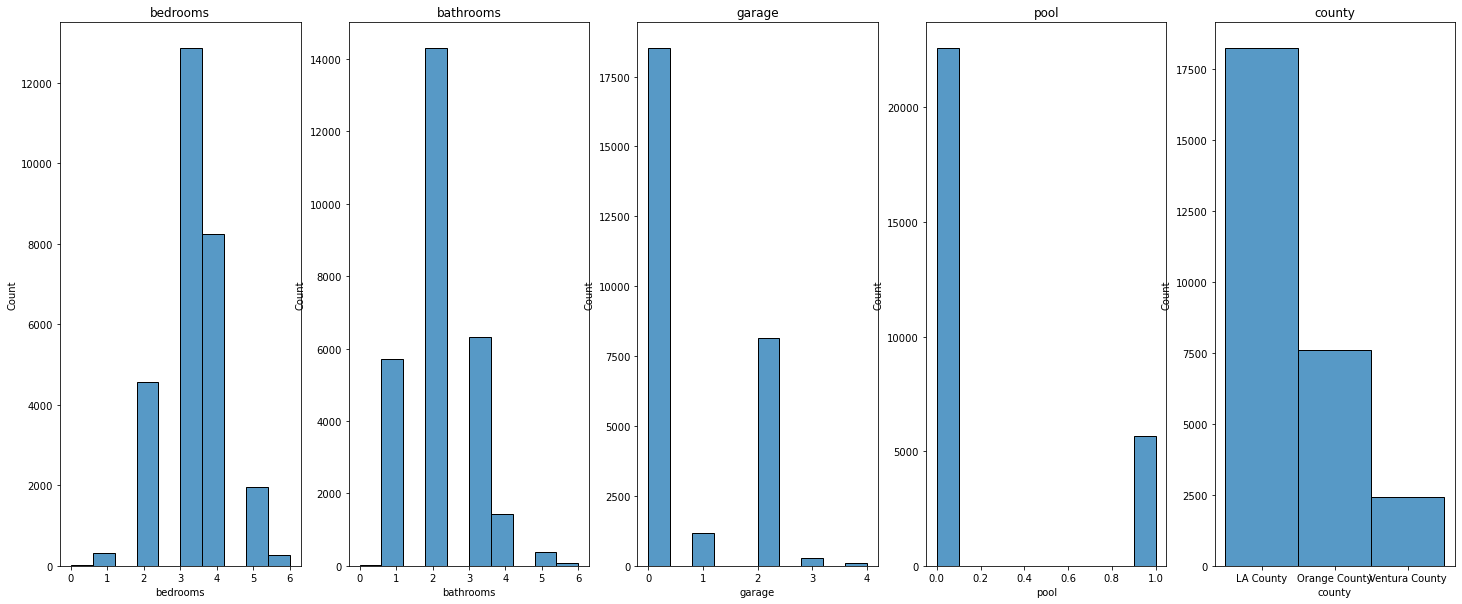

In [10]:
explore.plot_histograms(train, categorical)

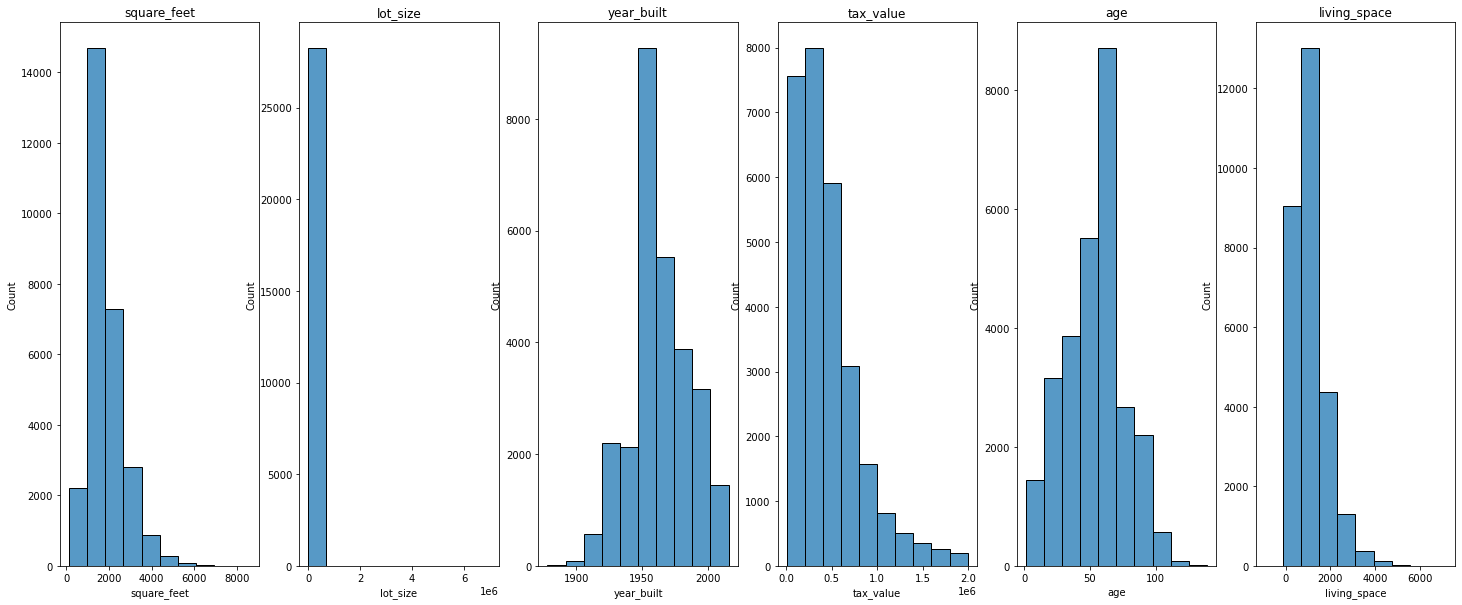

In [11]:
explore.plot_histograms(train, continuous)

## Bivariate analysis
- Bivariate analysis means the analysis of the bivariate data. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. The variables that are involved are X and Y.

Describe which variables will be used <br>
Describe what is expected why this may be important

Use:
- Scatter plots – This gives an idea of the patterns that can be formed using the two variables
- Regression Analysis – This uses a wide range of tools to determine how the data post could be related. The post may follow an exponential curve. The regression analysis gives the equation for a line or curve. It also helps to find the correlation coefficient.
- Correlation Coefficients – The coefficient lets you know if the data in question are related. When the correlation coefficient is zero then this means that the variables are not related. If the correlation coefficient is a positive or a negative 1 then this means that the variables are perfectly correlated.

Factors to consider


Tests for comparison

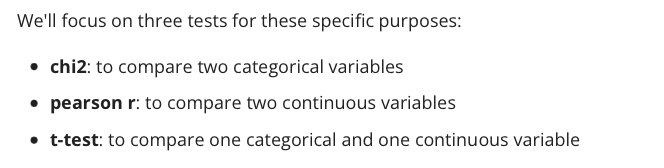

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

Generating plots square_feet by bedrooms


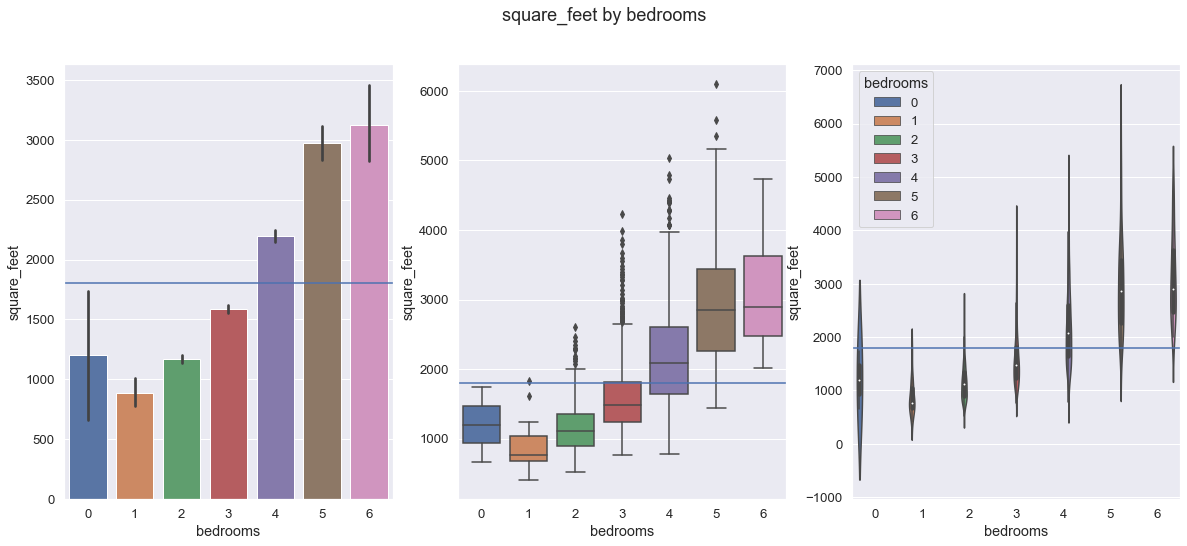

Generating plots square_feet by bathrooms


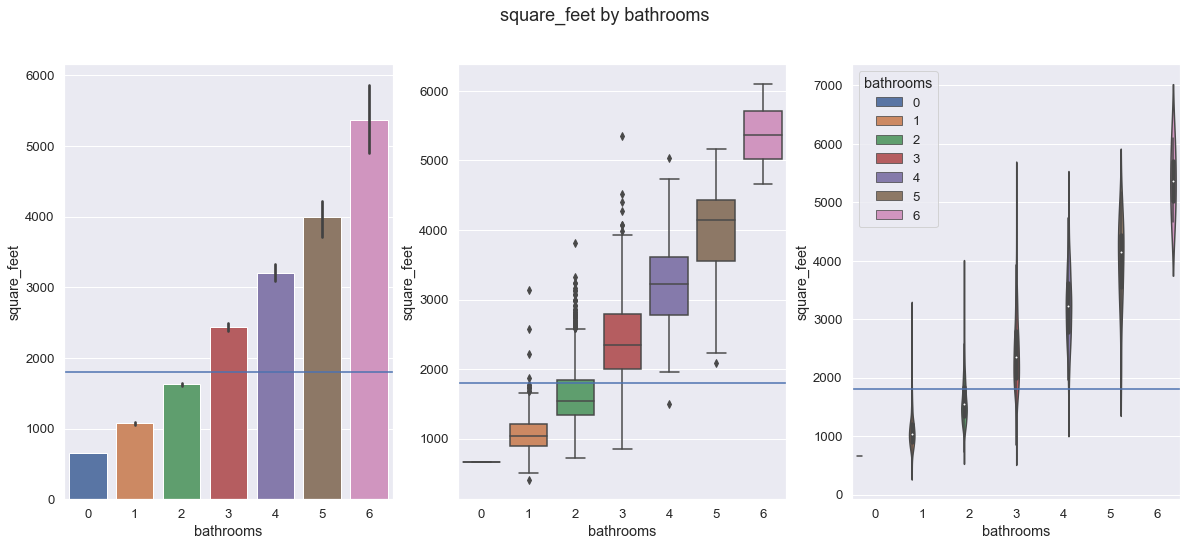

Generating plots square_feet by garage


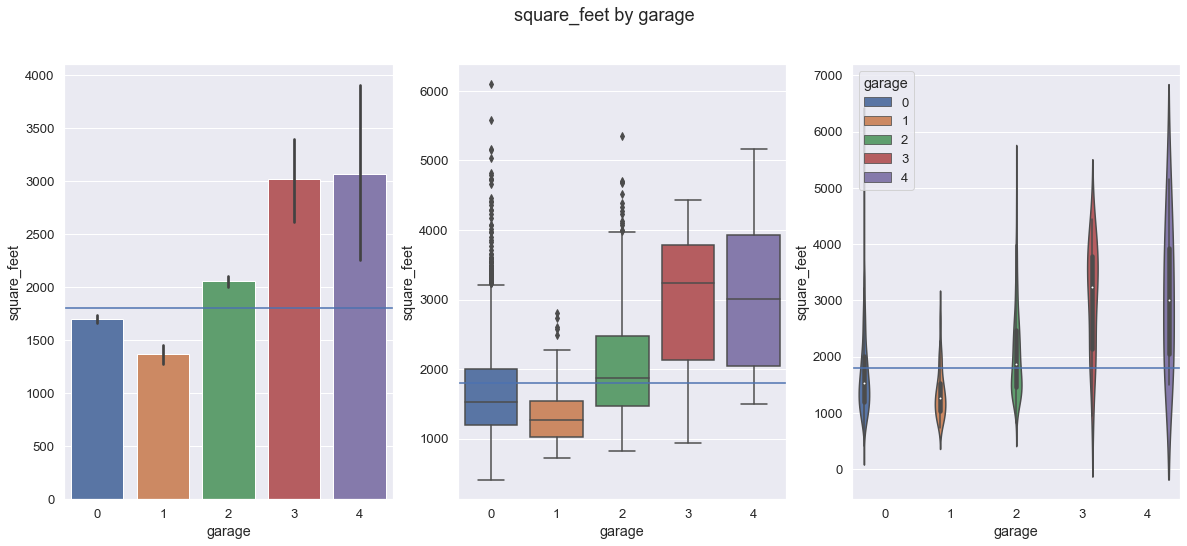

Generating plots square_feet by pool


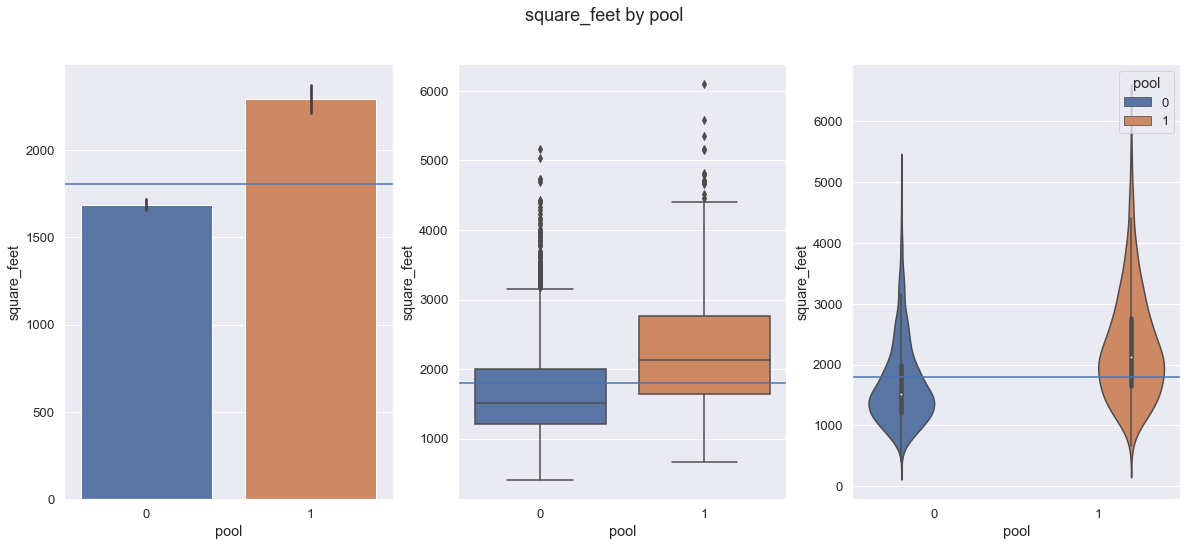

Generating plots square_feet by county


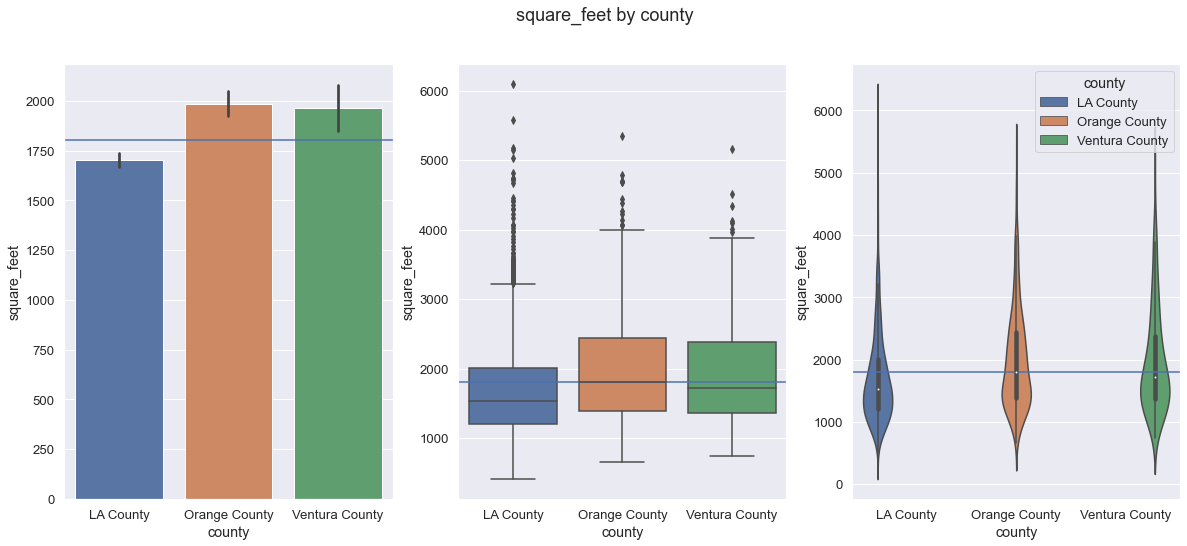

Generating plots lot_size by bedrooms


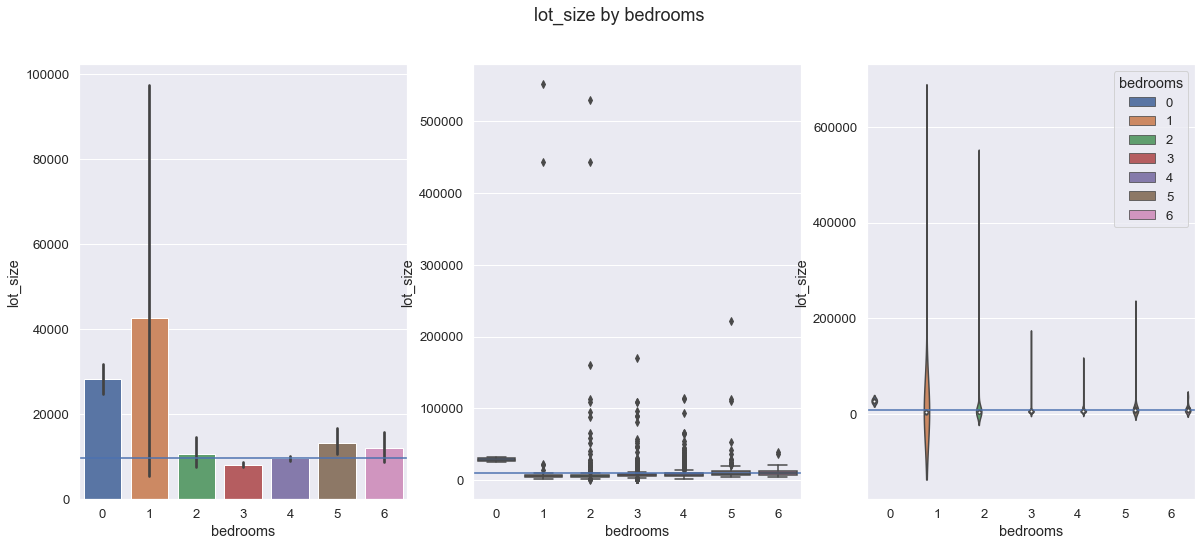

Generating plots lot_size by bathrooms


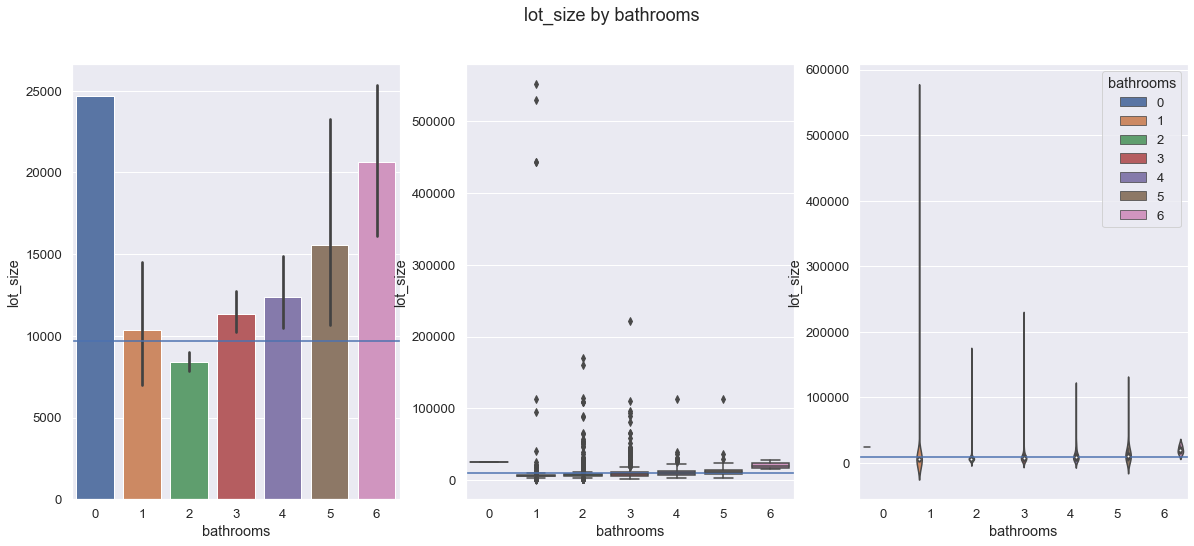

Generating plots lot_size by garage


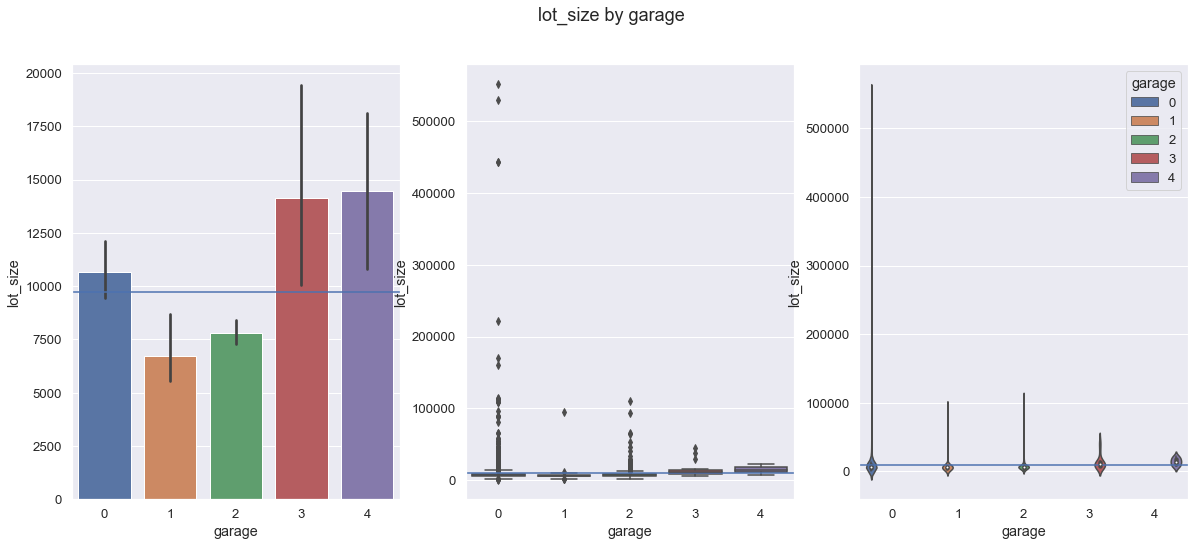

Generating plots lot_size by pool


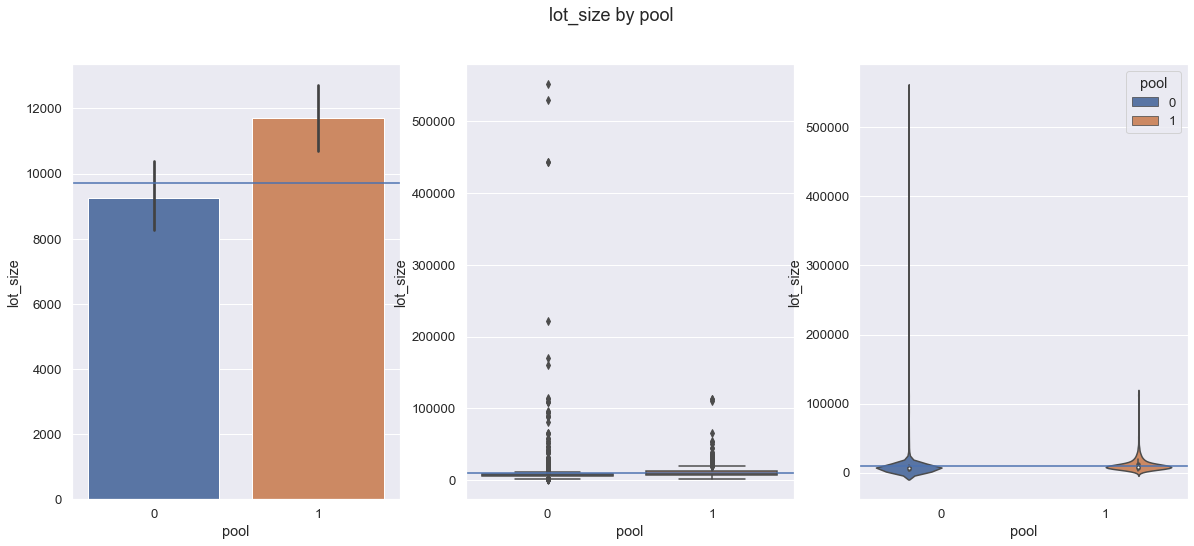

Generating plots lot_size by county


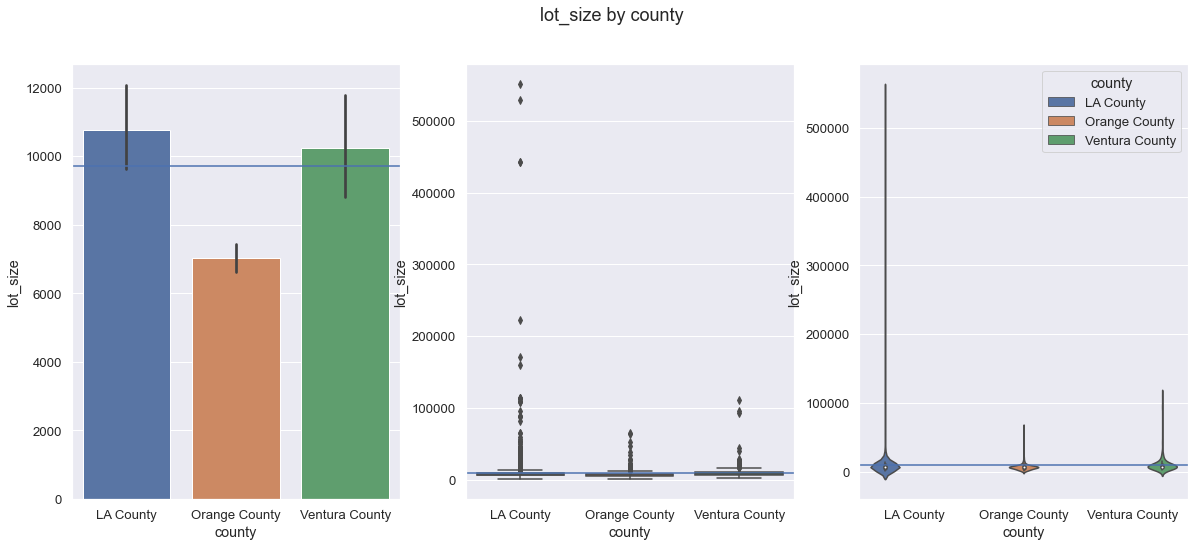

Generating plots year_built by bedrooms


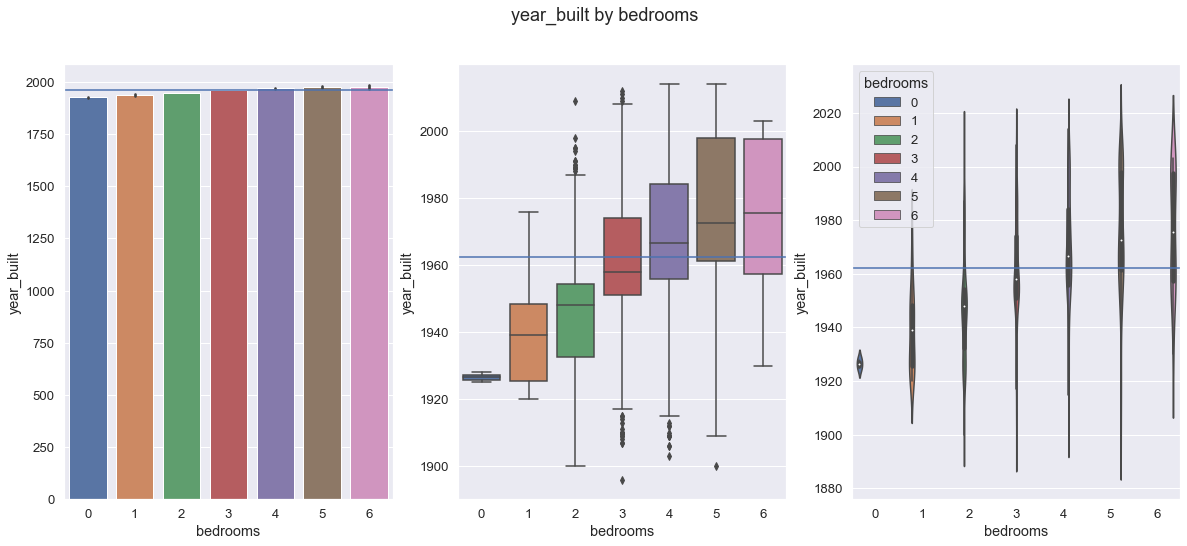

Generating plots year_built by bathrooms


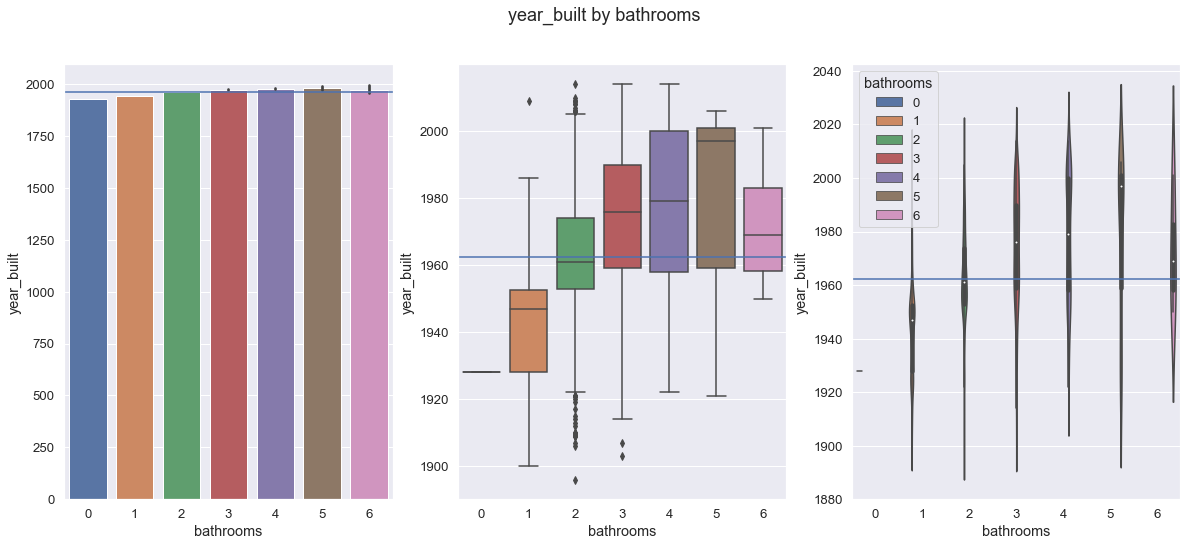

Generating plots year_built by garage


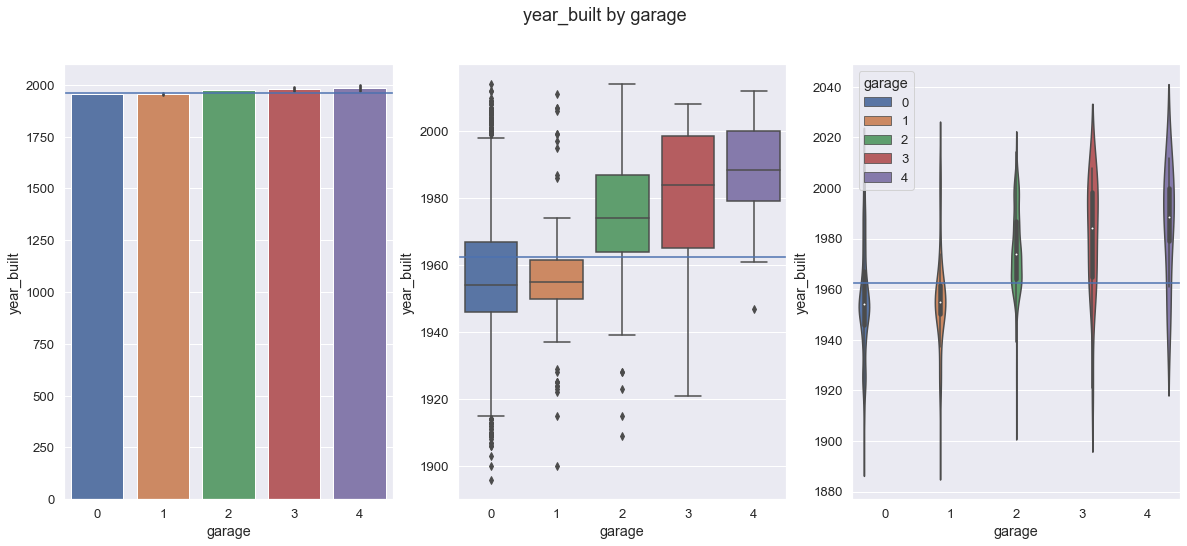

Generating plots year_built by pool


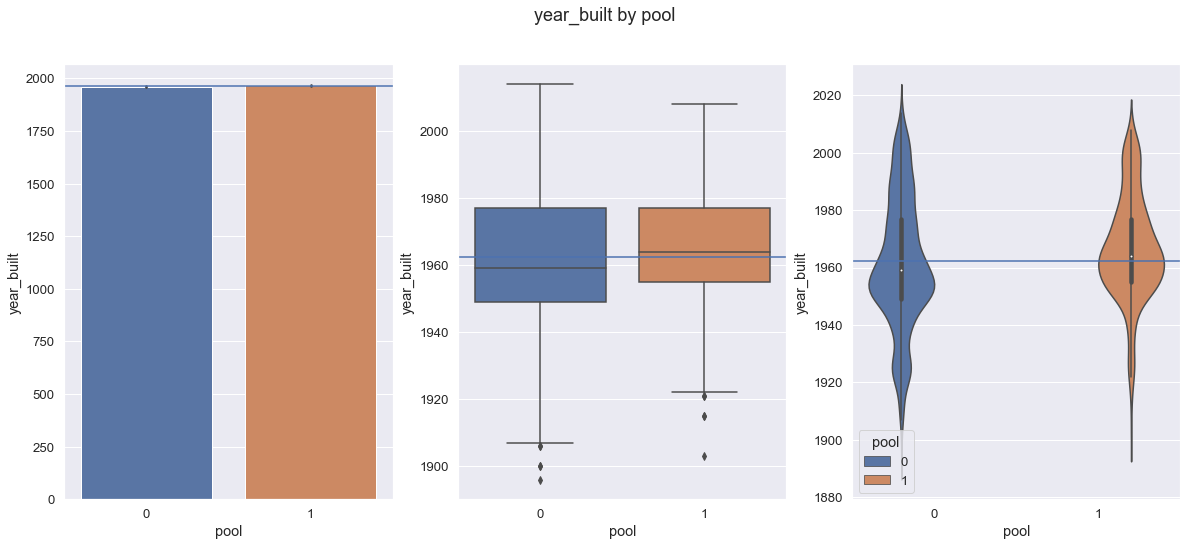

Generating plots year_built by county


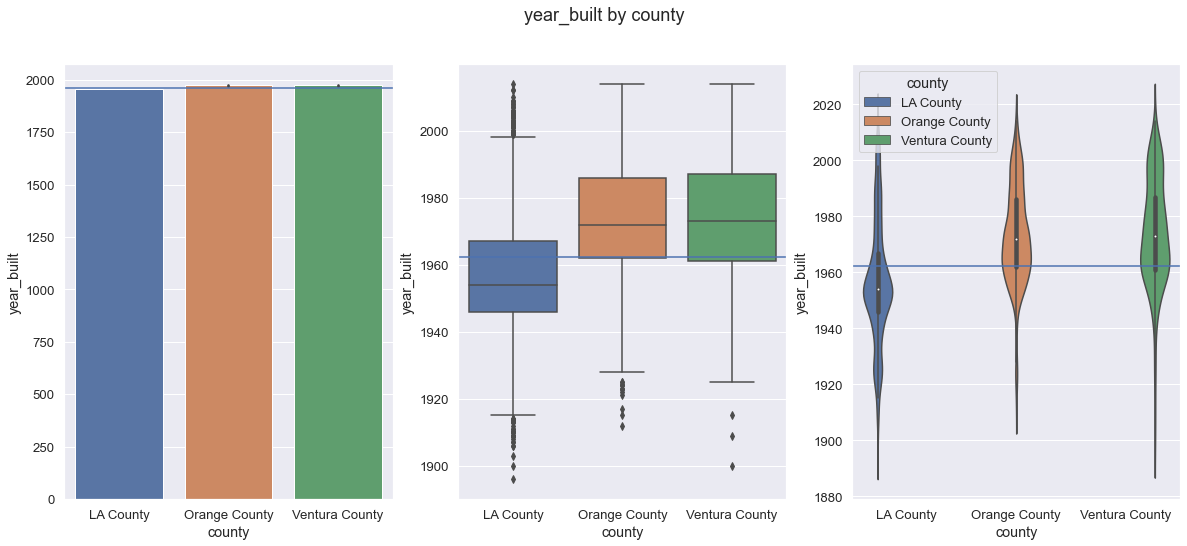

Generating plots tax_value by bedrooms


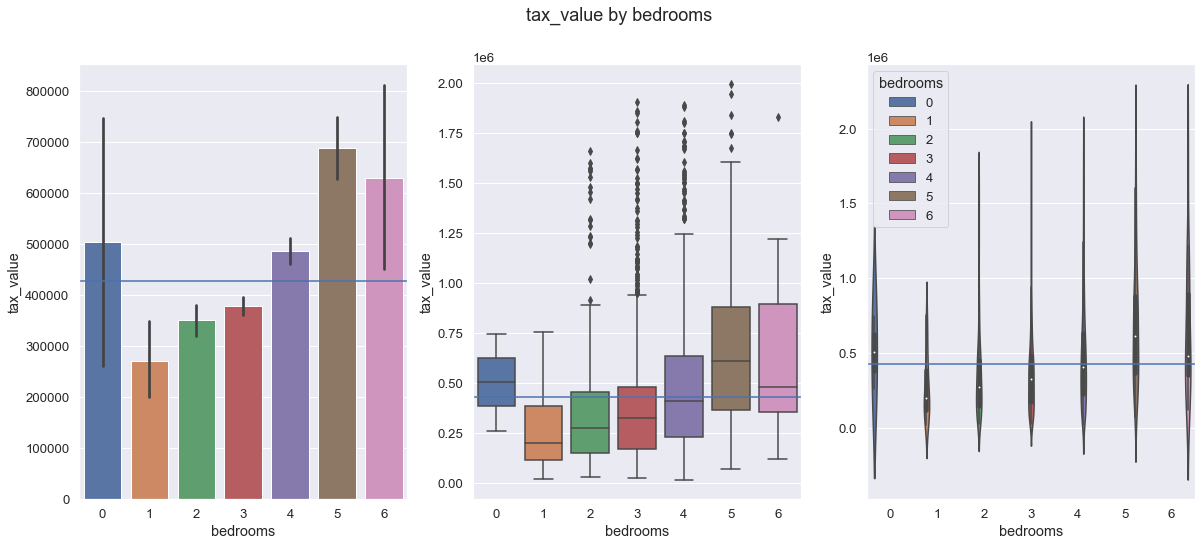

Generating plots tax_value by bathrooms


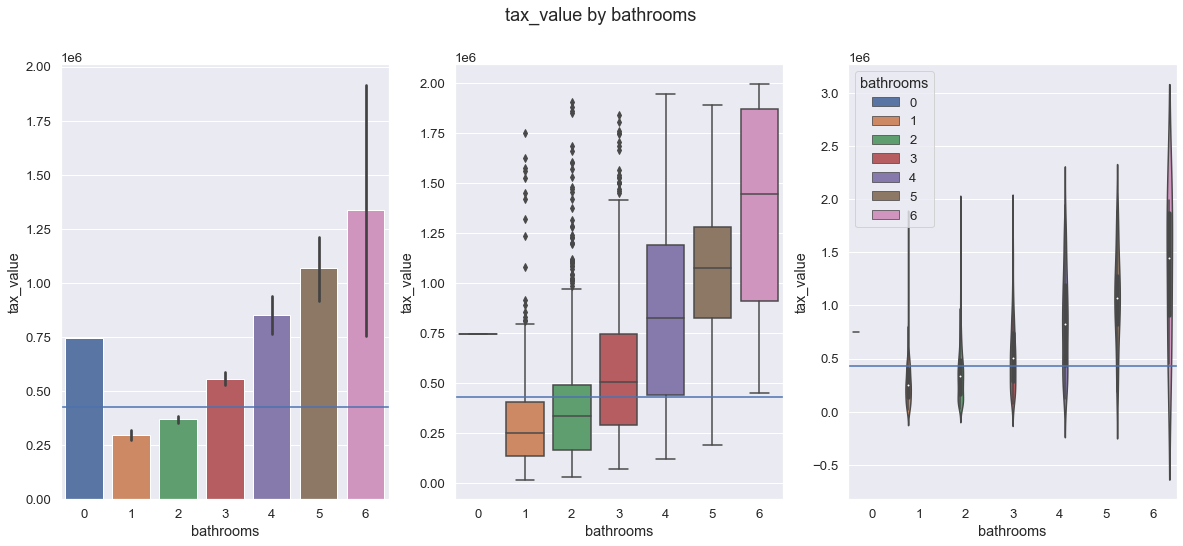

Generating plots tax_value by garage


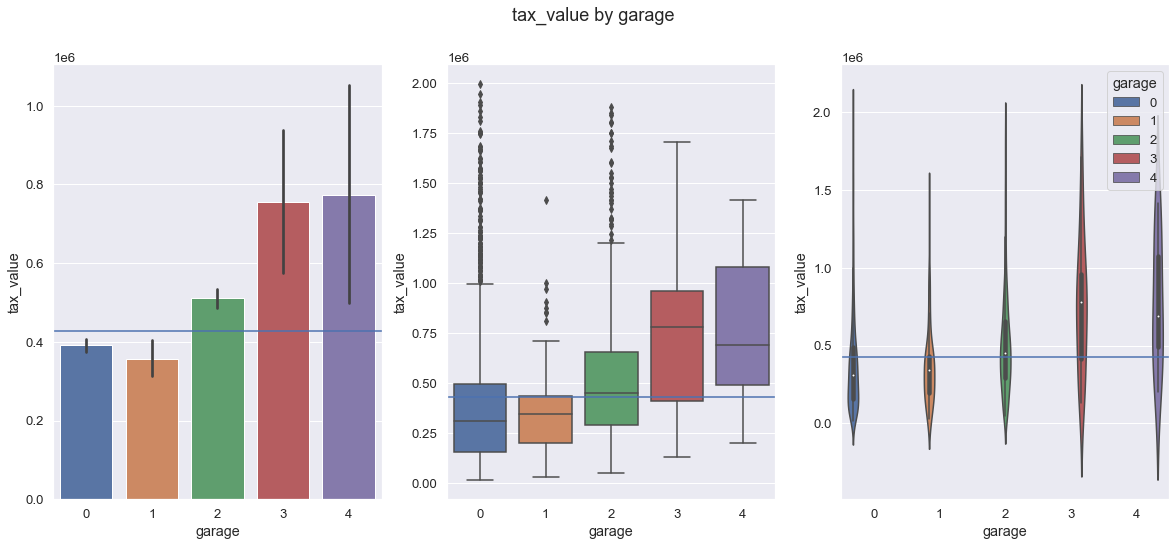

Generating plots tax_value by pool


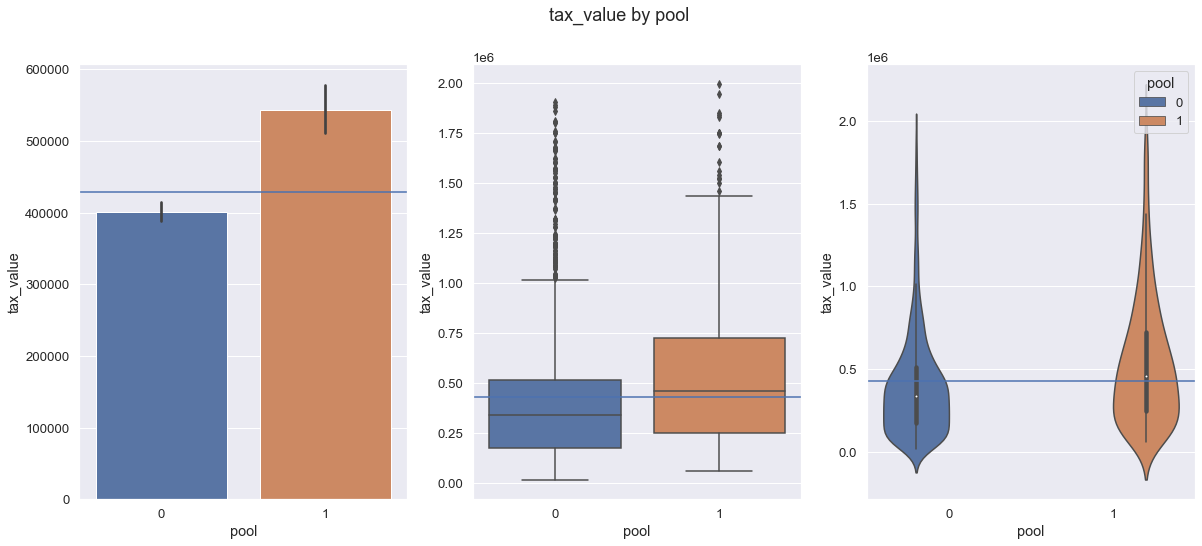

Generating plots tax_value by county


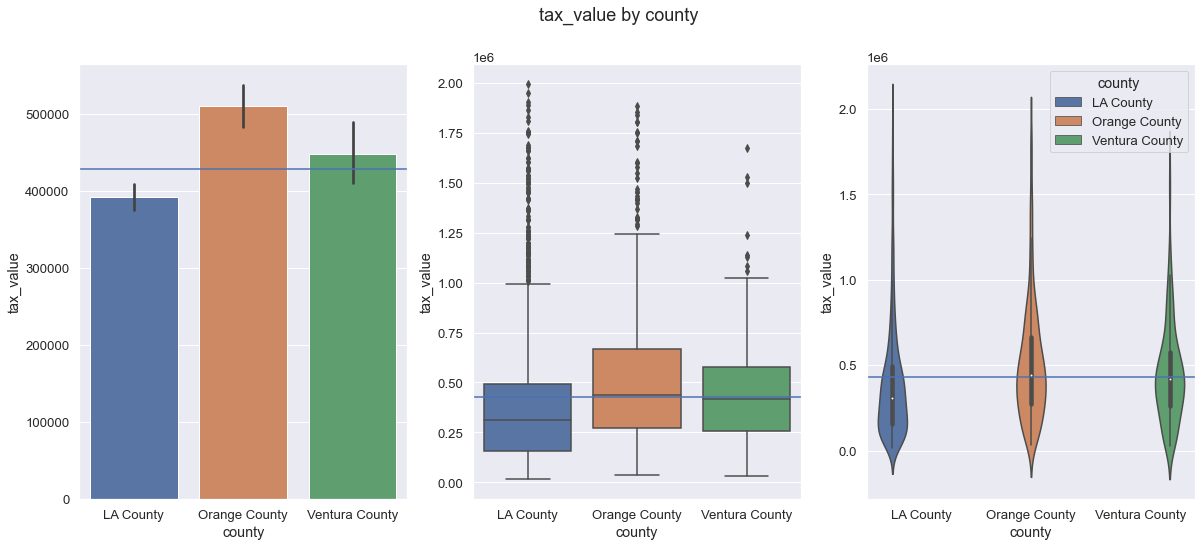

Generating plots age by bedrooms


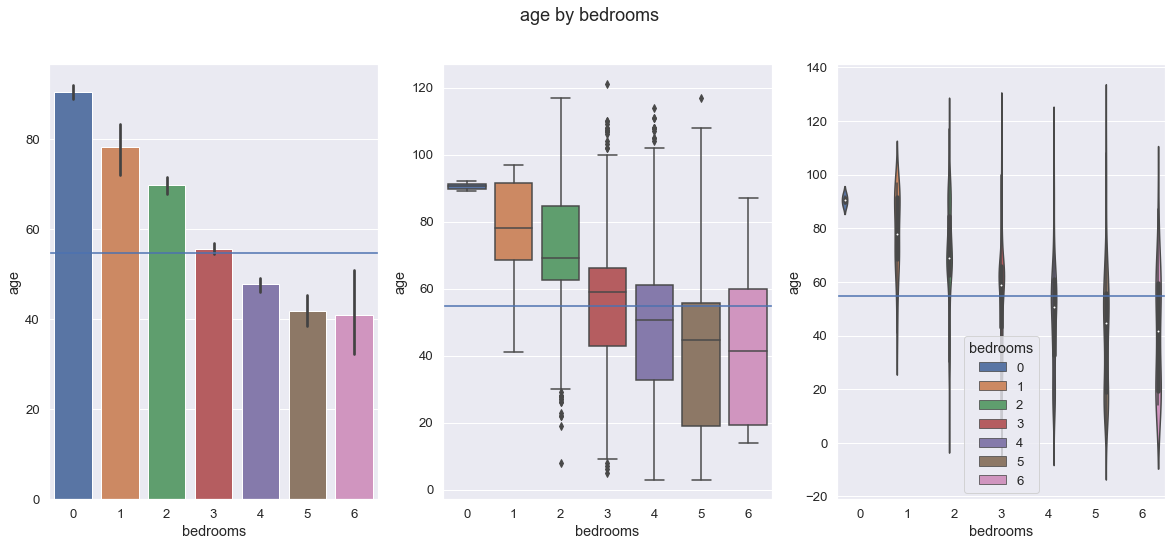

Generating plots age by bathrooms


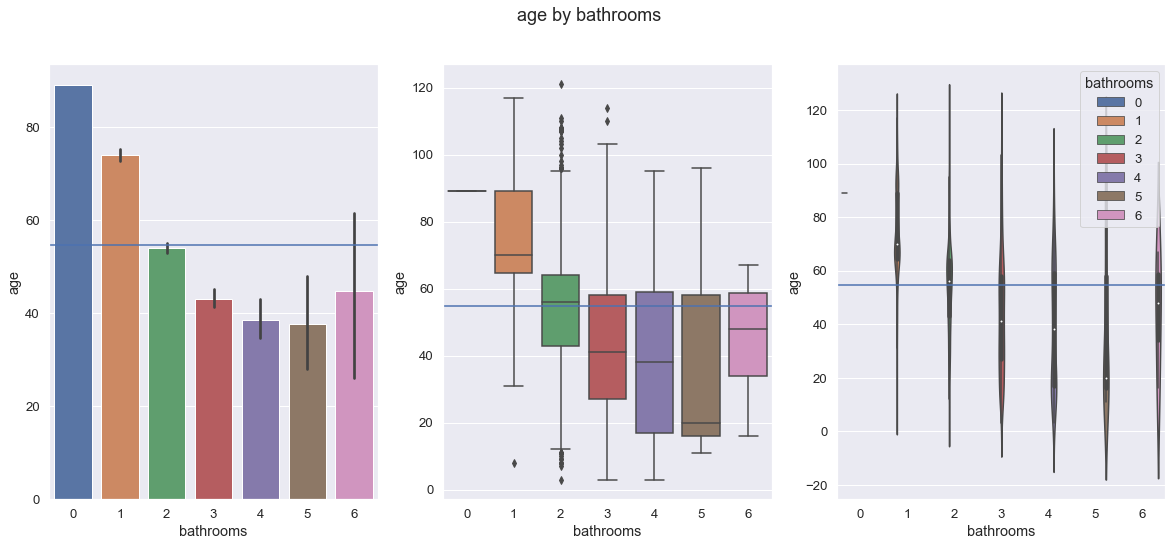

Generating plots age by garage


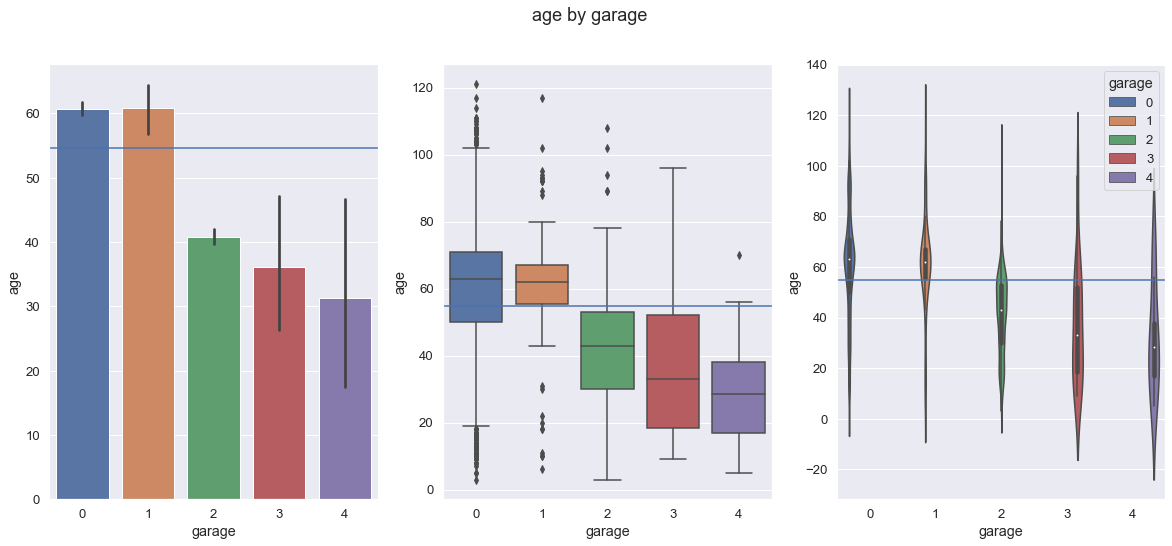

Generating plots age by pool


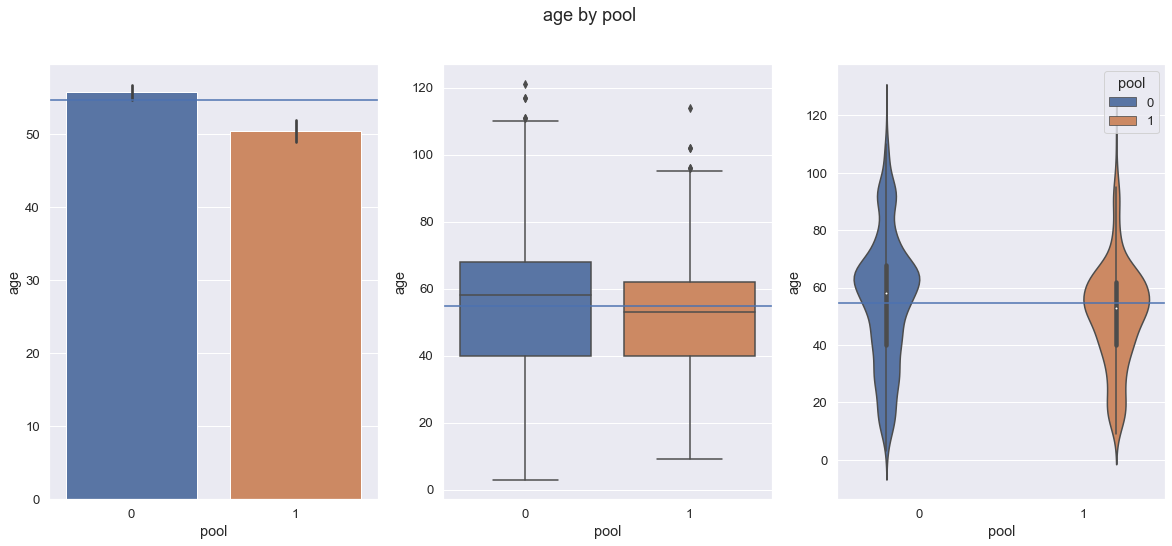

Generating plots age by county


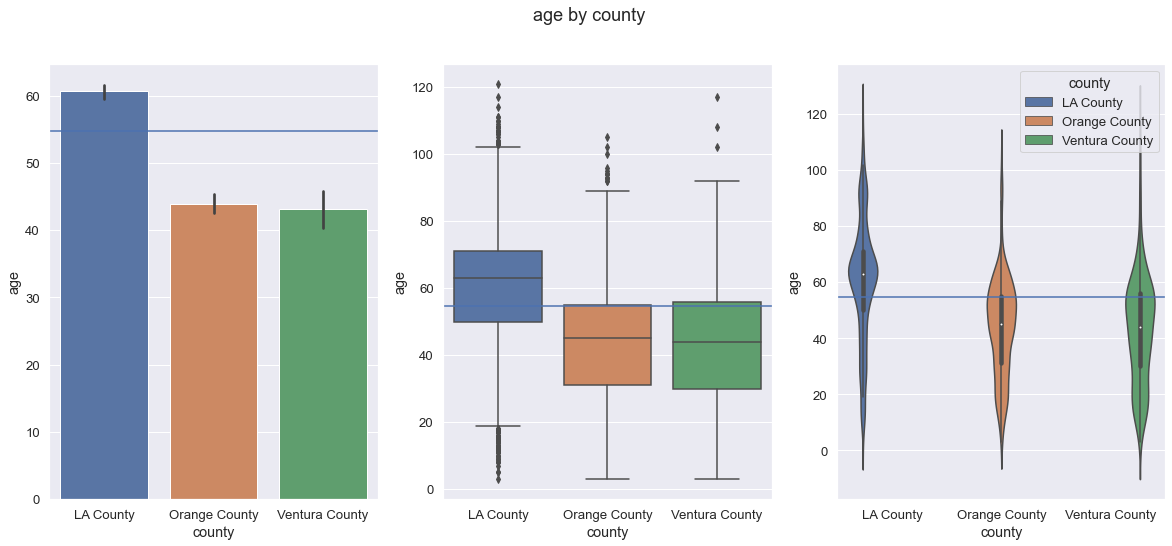

Generating plots living_space by bedrooms


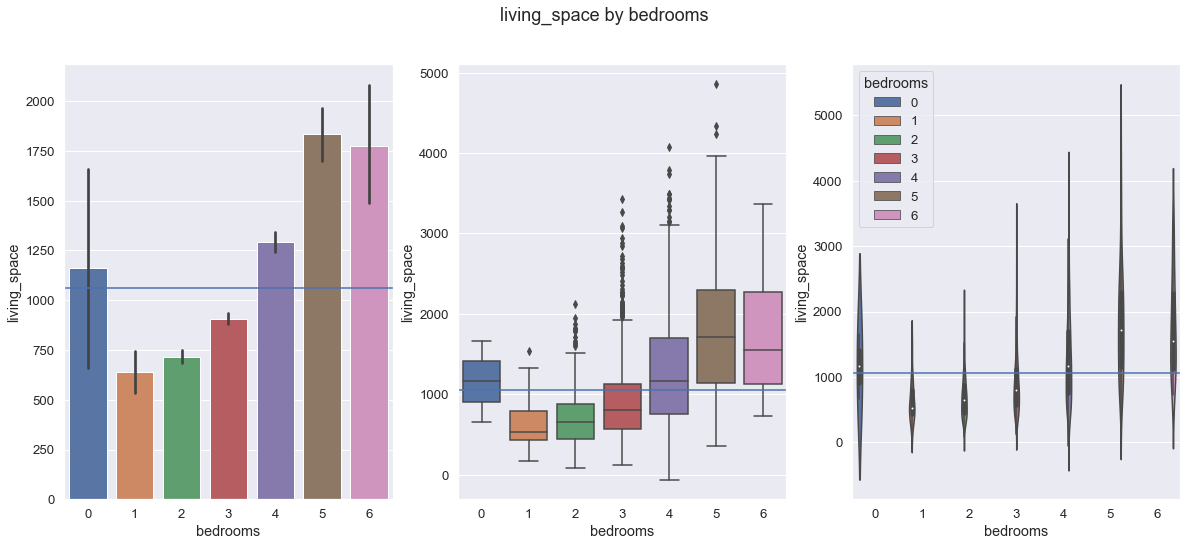

Generating plots living_space by bathrooms


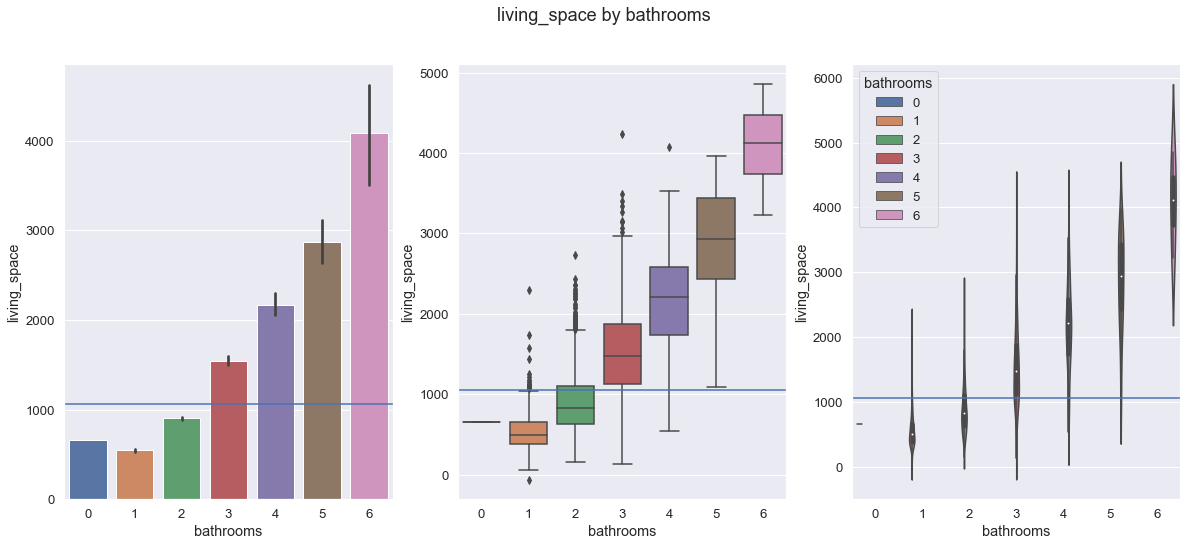

Generating plots living_space by garage


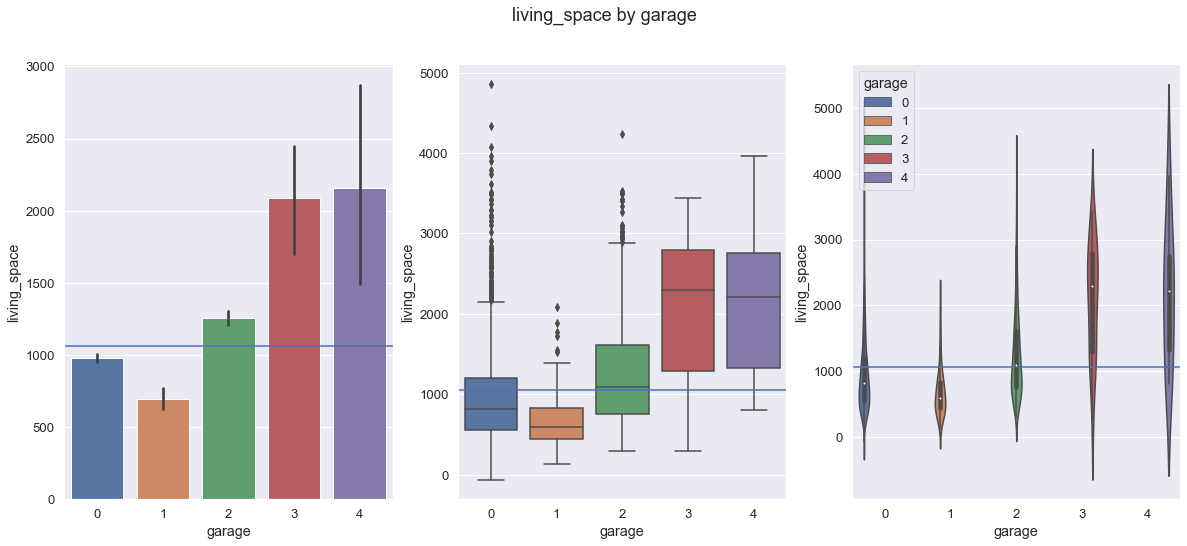

Generating plots living_space by pool


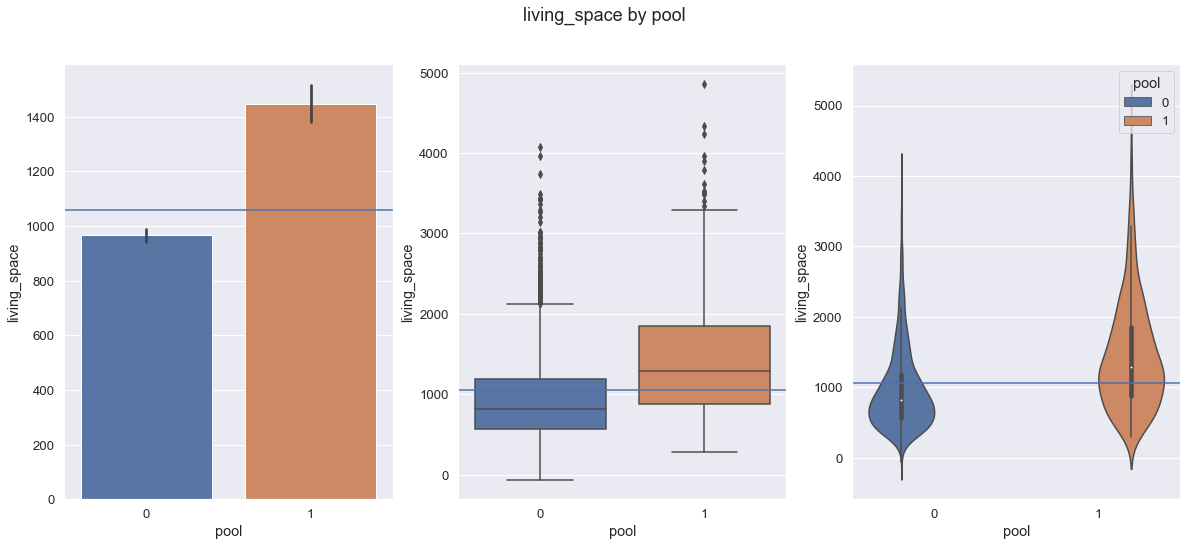

Generating plots living_space by county


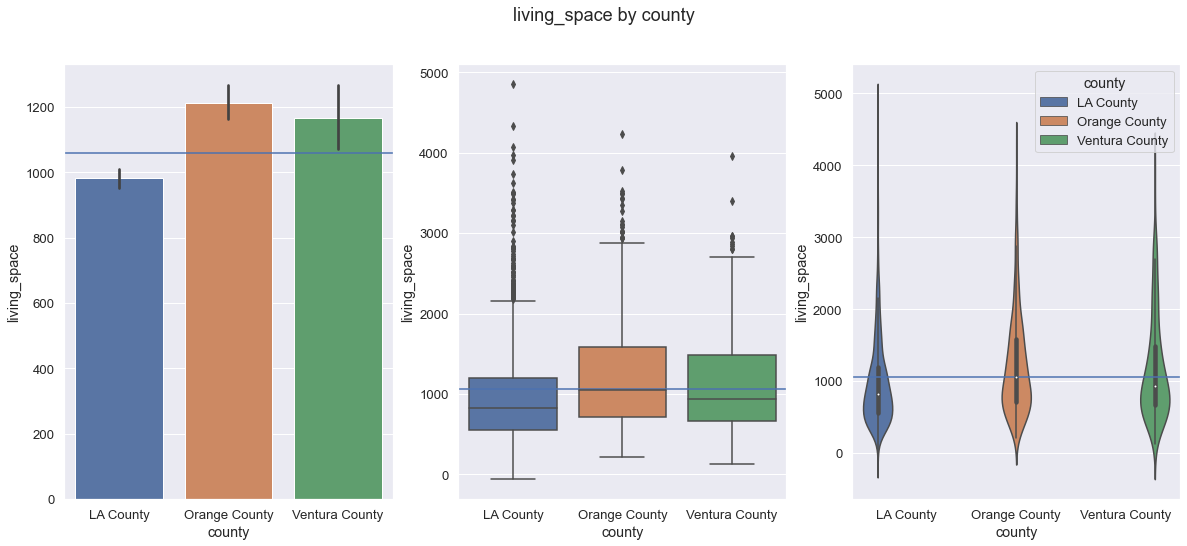

In [12]:
explore.plot_categorical_and_continuous_vars(train, categorical, continuous, sample_amt=2500)

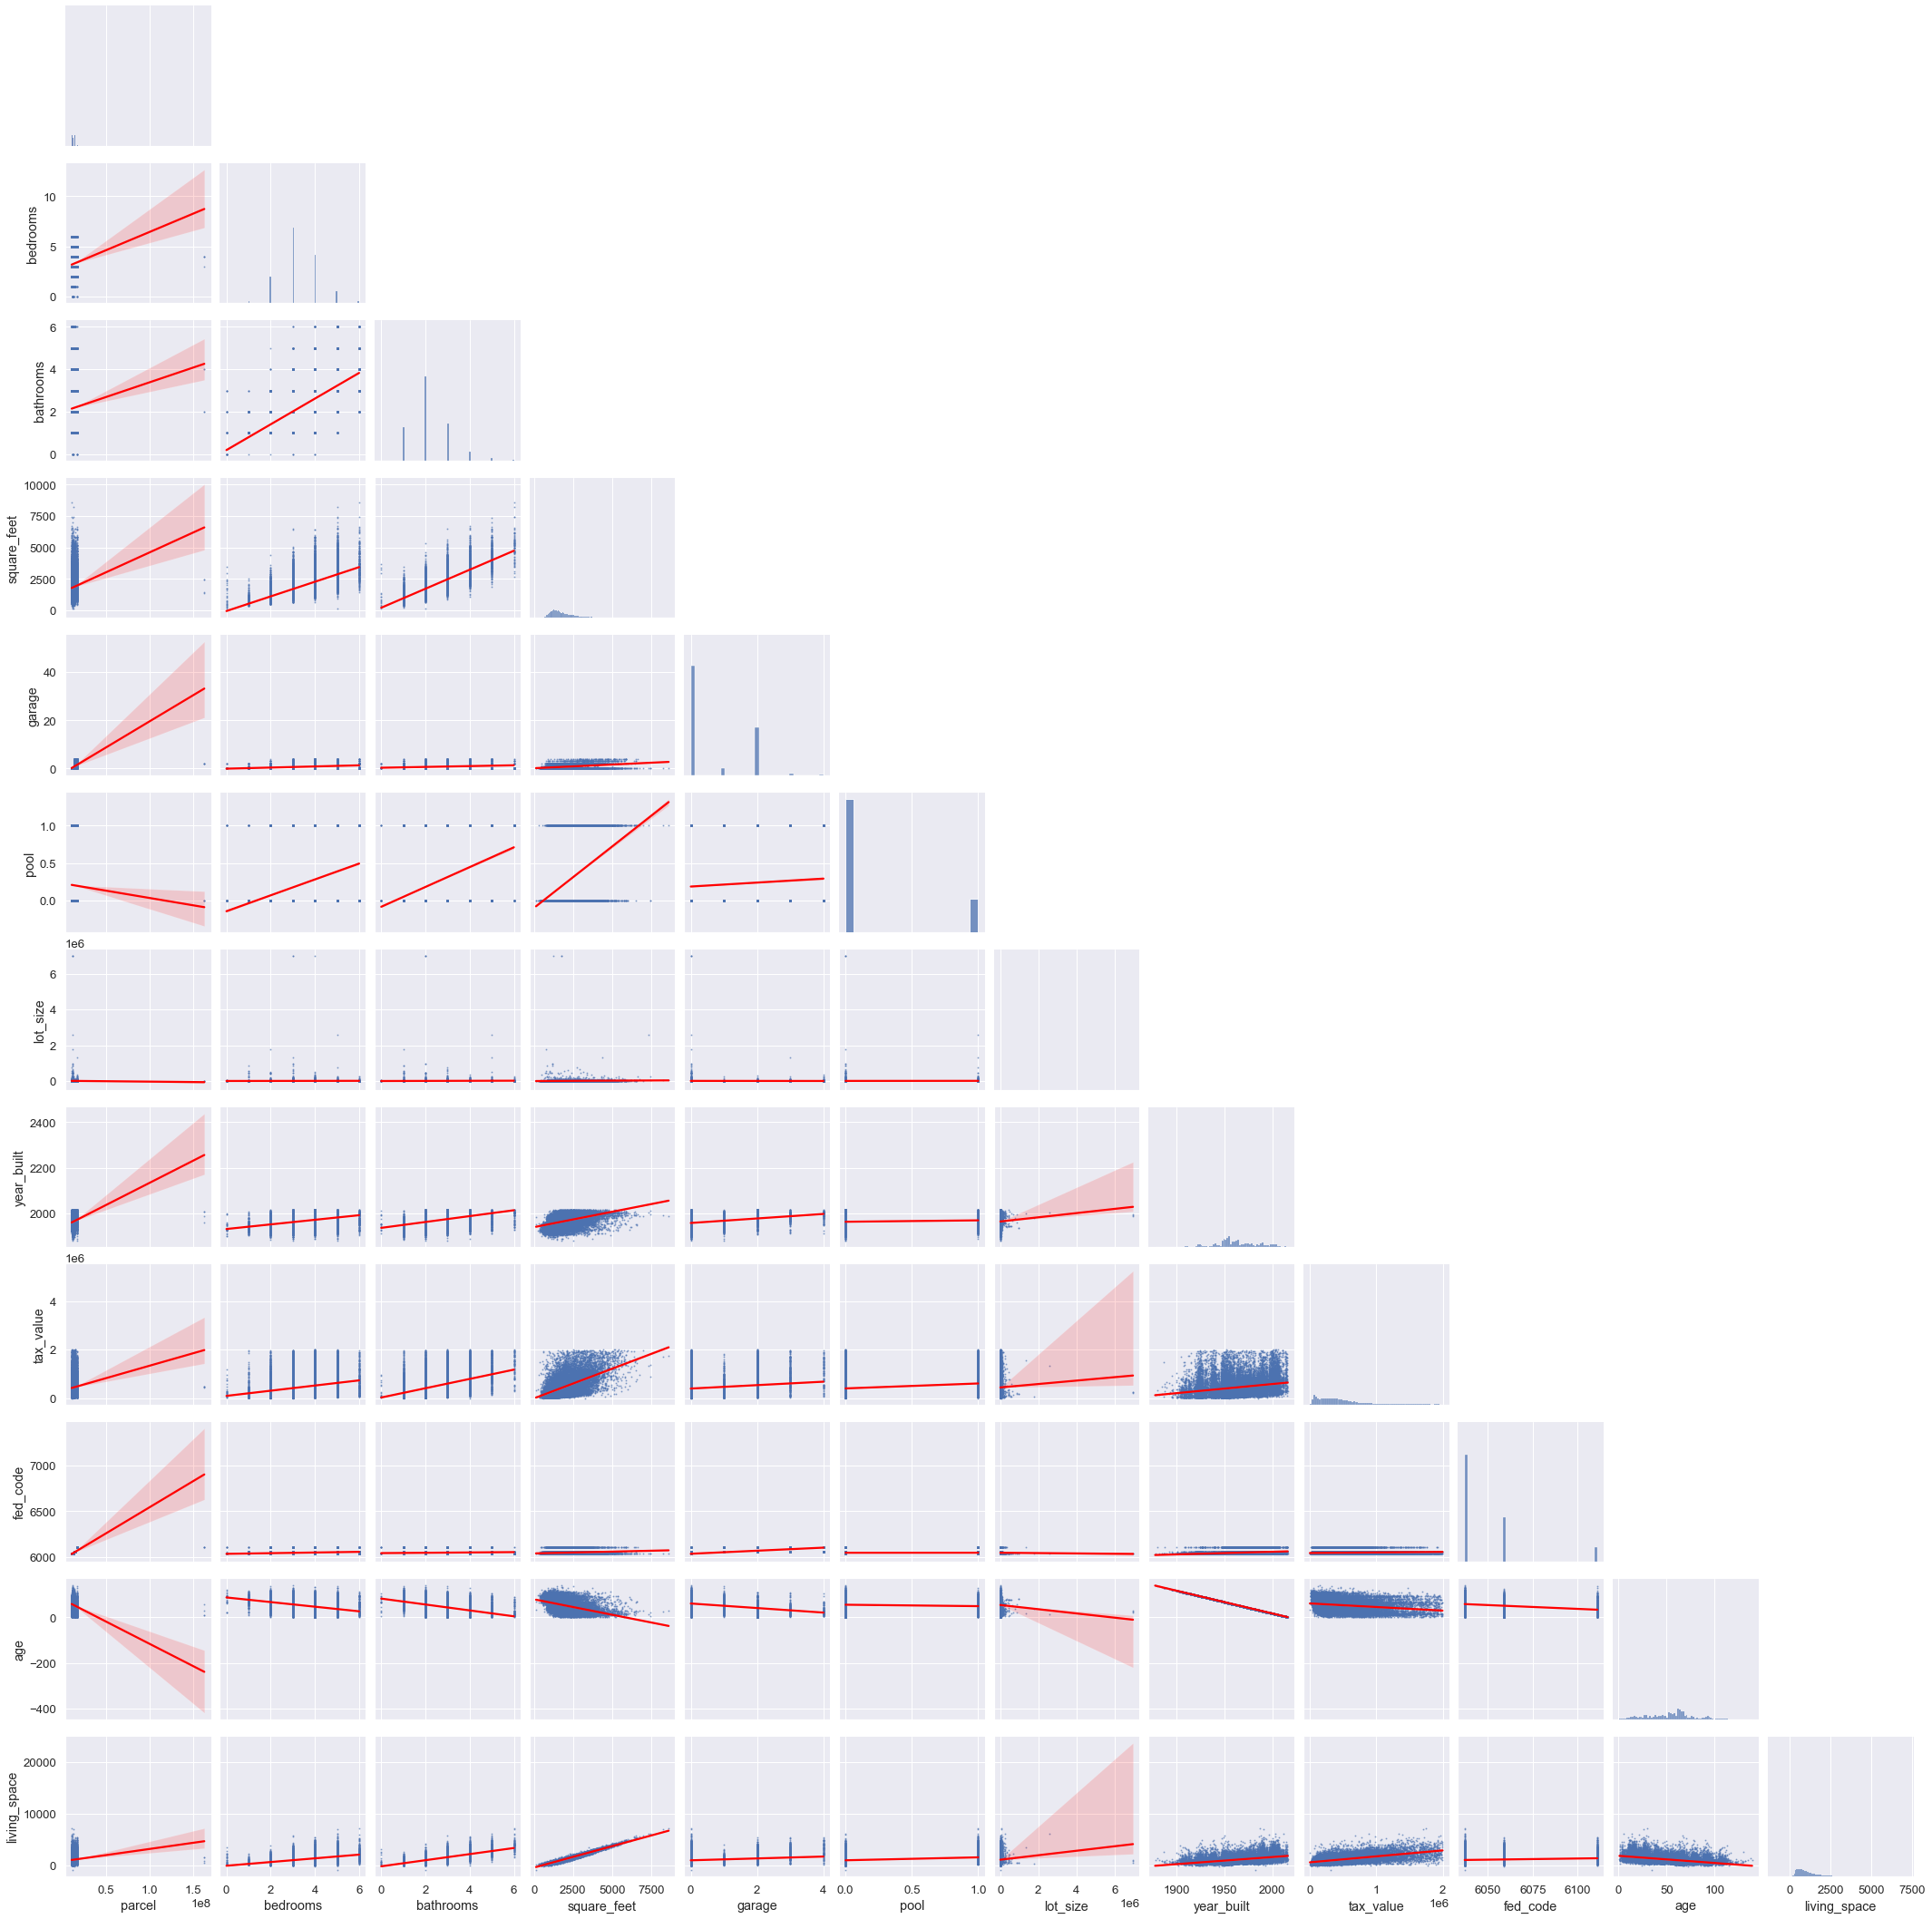

In [13]:
explore.plot_pairplot_pairs(train)

## Multivariate Analysis


- Regression analysis: Used to determine the relationship between a dependent variable and one or more independent variable.
- Analysis of Variance (ANOVA): Used to determine the relationship between collections of data by analyzing the difference in the means.
- Interdependent analysis: Used to determine the relationship between a set of variables among themselves.
- Discriminant analysis: Used to classify observations in two or more distinct set of categories.
- Classification and cluster analysis: Used to find similarity in a group of observations.
- Principal component analysis: Used to interpret data in its simplest form by introducing new uncorrelated variables.
- Factor analysis: Similar to principal component analysis, this too is used to crunch big data into small, interpretable forms.
- Canonical correlation analysis: Perhaps one of the most complex models among all of the above, canonical correlation attempts to interpret data by analyzing relationships between cross-covariance matrices.

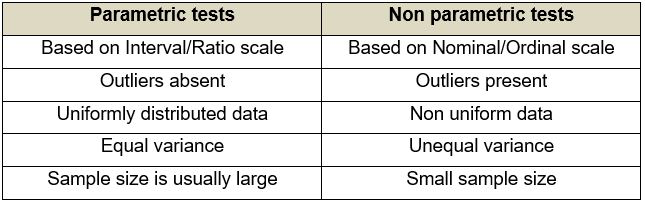
https://static.s4be.cochrane.org/app/uploads/2021/09/multivariate-blog.jpg
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [14]:
train_continuous = train[['square_feet','lot_size','year_built', 'tax_value','age']]

In [15]:
chi2, p, degf, expected = stats.chi2_contingency(train_continuous)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[5.56770104e+02 3.18177840e+03 5.92395673e+02 1.33621767e+05
  1.62892137e+01]
 [3.55736989e+03 2.03293291e+04 3.78499225e+03 8.53749232e+05
  1.04076634e+02]
 [2.77348339e+03 1.58496469e+04 2.95094788e+03 6.65620779e+05
  8.11427614e+01]
 ...
 [2.61559149e+02 1.49473409e+03 2.78295309e+02 6.27727591e+04
  7.65233775e+00]
 [1.76887673e+03 1.01086135e+04 1.88206032e+03 4.24520698e+05
  5.17513617e+01]
 [5.67492354e+02 3.24305293e+03 6.03803999e+02 1.36195048e+05
  1.66029106e+01]]
---

chi^2 = 2091455737.6040
p     = 0.0000


In [16]:
results = pd.DataFrame(columns=['Features','Chi2Weights'])

for i in range (len(train_continuous.columns)):
    chi2, p = stats.chisquare(train_continuous[train_continuous.columns[i]])
    results = results.append([pd.Series([train_continuous.columns[i], chi2], index=results.columns)], ignore_index = True)

In [17]:
results = results.sort_values(by = "Chi2Weights", ascending = False)
results.head(20)

,Features,Chi2Weights
1,lot_size,16114217470.699177
3,tax_value,7919238294.3362
0,square_feet,10398727.684904
4,age,271089.21413
2,year_built,7454.190411


In [18]:
chi_df = train[results["Features"].head(20)]
chi_df.head()

,lot_size,tax_value,square_feet,age,year_built
14733,2772,132267,913,32,1985
15170,6760,871083,1665,58,1959
21158,10650,672576,2033,68,1949
29556,6000,479243,2252,25,1992
3648,10526,686553,2552,48,1969


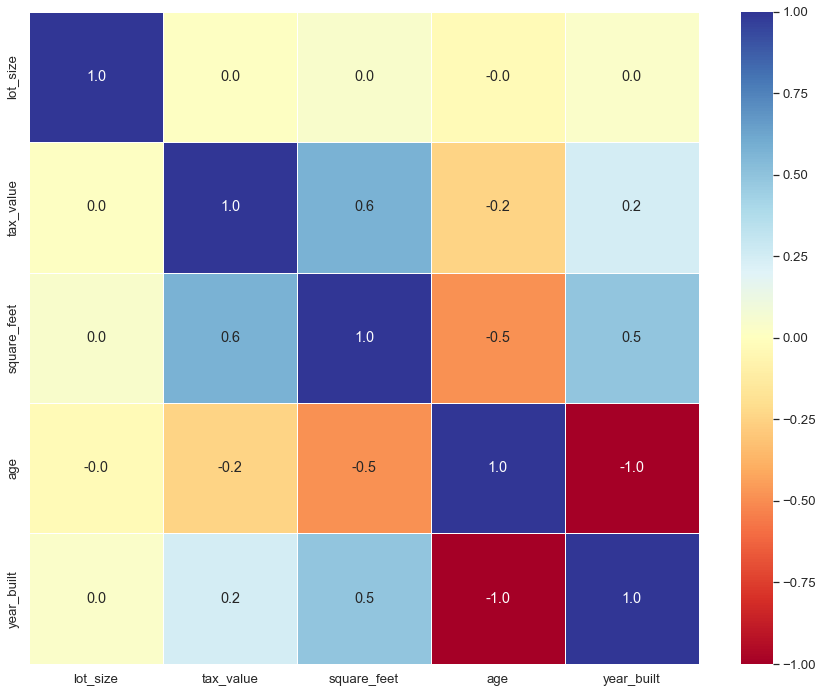

In [19]:
# Finding Correlation - Need to limit to continuous variables only
plt.figure(figsize = (15, 12))
sns.heatmap(chi_df.corr(), cmap="RdYlBu", annot=True, linewidth=0.5, fmt=".1f")

plt.show()

# Hypothesis Testing
- Ho1: There is no correlation between `bedrooms` and Value
- H02: There is no correlation between `bathrooms` and Value
- Ho3: There is no correlation between `square_feet` and Value
- Ho4: There is no correlation between `garage` and Value
- Ho5: There is no correlation between `age` and Value
- Ho6: There is no correlation between `lot_size` and Value
- Ho7: There is no correlation between `pool` and Value
- Ho8: There is no correlation between `living_space` and Value
- Ho9: There is no correlation between `county` and Value

In [20]:
#Look at numeric features vs target for continuous variables
combos = combinations(['square_feet','lot_size','year_built', 'tax_value','age', 'living_space'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    explore.stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between square_feet  and lot_size of a property
We reject the null hypothesis, p = 2.911705859833086e-14 | α = 0.05
  corr: 0.04521075114591501

H₀: There is no linear correlation between square_feet  and year_built of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.49005598994459953

H₀: There is no linear correlation between square_feet  and tax_value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5717561656809462

H₀: There is no linear correlation between square_feet  and age of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: -0.4900559899445995

H₀: There is no linear correlation between square_feet  and living_space of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.978264149999558

H₀: There is no linear correlation between lot_size  and year_built of a property
We reject the null hypothesis, p = 1.1711682777954296e-07 | α = 0.05
  corr: 0.03151551935

In [25]:
#Look at numeric features vs target for categorical variables
combos = combinations(['bedrooms', 'bathrooms','garage', 'pool','fed_code', 'tax_value'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    explore.stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between bedrooms  and bathrooms of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.6166771345995892

H₀: There is no linear correlation between bedrooms  and garage of a property
We reject the null hypothesis, p = 1.5449624419036687e-297 | α = 0.05
  corr: 0.21675193563559686

H₀: There is no linear correlation between bedrooms  and pool of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.2379711504968393

H₀: There is no linear correlation between bedrooms  and fed_code of a property
We reject the null hypothesis, p = 2.3634327127785293e-143 | α = 0.05
  corr: 0.15081730416547862

H₀: There is no linear correlation between bedrooms  and tax_value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.269780600804833

H₀: There is no linear correlation between bathrooms  and garage of a property
We reject the null hypothesis, p = 9.166806566778885e-156 | α = 0.05
  corr: 0.15722114107954

# Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Feature Selection
- Key Features and why
- Validation Tools

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2